# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

Ans:神经元接收一些输入信号，然后经过一些计算后（多数为线性运算），输出一个输出信号的过程，叫做神经元计算。

####  2. Why we use non-linear activation funcitons in neural networks?

Ans:神经网络的主要运算就是线性运算，如果激活函数也是线性函数的话，那么无论多少层的神经网络都可以转化为一层表示，层数就没有意义了。

#### 3. What is the 'Logistic Loss' ?

Ans:logistic loss 主要用于度量sigmoid函数中预测值和真实值的差别；

logistic loss 是cross entropy的一个特例，logistic loss 主要用于二分类问题，cross entropy主要用于多分类问题；

cross entropy的公式为：H(p,q)=−∑xp(x)logq(x)；

假设p∈{y,1−y}p∈{y,1−y} ，q∈{y^,1−y^}q∈{y^,1−y^}， cross entropy可以写为logistic loss：
H(p,q)=−∑xp(x)logq(x)=−ylogy^−(1−y)log(1−y^)

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

Ans:选择C，虽然sigmoid函数在输入值较大或较小时偏导数很小，迭代较慢，但sigmoid函数的值域是（0，1），更符合二分类问题的概率分布范围。

#### 5. Why we don't use zero initialization for all parameters ?

Ans:如果所有参数（尤其是参数w)初始化为0的话，会出现对称性问题，导致多个神经元和一个神经元没有差别。

#### 6. Can you implement the softmax function using python ? 

In [2]:
import numpy as np

def softmax(array):
    array -= np.max(array)
    return np.exp(array)/ np.sum(np.exp(array))

In [3]:
softmax(np.array([1,2,3,4]))

array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

In [6]:
softmax(np.array([0.01,0.2,3,4]))

array([0.01313201, 0.01587987, 0.26113892, 0.70984919])

In [8]:
#数据大于10的话效果好差。
softmax(np.array([1,20,30,4]))

array([2.54355017e-13, 4.53978687e-05, 9.99954602e-01, 5.10885709e-12])

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [2]:
# Loading the data 
digits = datasets.load_digits()

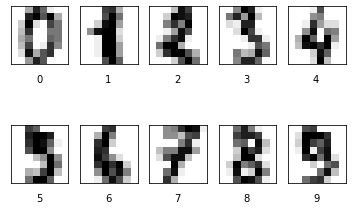

In [8]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [124]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [125]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [112]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](./networks.png)

In [9]:
!pwd

'pwd' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [20]:
import numpy as np
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1./(np.exp(-1*z)+1)
    
    return s

In [13]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [16]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim, 1)
    b = np.random.ranf()
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [19]:
initialize_parameters(5)

(array([[-0.82881365],
        [ 0.08005987],
        [ 1.01523218],
        [ 0.87391544],
        [-0.6167195 ]]), 0.07325510057195805)

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [97]:
import numpy as np

def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation   
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[1]
    A = sigmoid(np.dot(X, w) + b)
    
    ## adjust value to avoid log0 and log1
    
    A_2 = A
    for i in range(A_2.shape[0]): 
        if A_2[i][0] == 1:
            A[i][0] = 0.999999999
        elif A_2[i][0] == 0:
            A[i][0] = 1e-10
    cost = (-1. / m) * np.sum(np.dot(np.log(A), Y.T) + np.dot(np.log(1. - A), 1. - Y.T))

    dw = (1 / m) * np.dot(X.T, np.subtract(A, Y))
    db = (1 / m) * np.sum(np.subtract(A, Y))
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

In [ ]:
init_parameters = initialize_parameters(m)
init_w = init_parameters[0]
init_b = init_parameters[1]
propagate(init_w, init_b, X_train, y_train.reshape(n,-1))

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [99]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):    
        grads, cost = propagate(w, b, X, Y)  
        dw = grads['dw']
        db = grads['db']        
        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 10 == 0:
            costs.append(cost)
        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

In [ ]:
n = X_train.shape[0]
m = X_train.shape[1]
init_w, init_b= initialize_parameters(m)
params, grads, costs = optimize(init_w, init_b, X_train, y_train.reshape(n, -1), 1000, 1e-3,True)

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [134]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    n=X.shape[0]
    Y_prediction = np.zeros((1,n))
    w = w.reshape(m,1)
    
    A = sigmoid(np.dot(X, w) + b)
    
    for i in range(A.shape[1]):
        if A[i][0] > 0.5:
            Y_prediction[0][i] = 1
        else:
            Y_prediction[0][i] = 0 
    
   # assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

In [102]:
def compute_prediction_accuracy(predicted_value, actual_value):
    total_record_number = actual_value.shape[0]
    correct_number = 0
    for i in range(total_record_number):
        if actual_value[i][0] == predicted_value[i][0]:
            correct_number += 1
            
    return correct_number / total_record_number

In [ ]:
trained_w = last_param[0]['w']
trained_b = last_param[0]['b']
testset_predicted_value = predict(trained_w, trained_b, X_test)

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [116]:
def model(X_train, Y_trein, X_test, Y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    n = X_train.shape[0]
    m = X_train.shape[1]

    init_w,init_b = initialize_parameters(m)
    last_param =optimize(init_w, init_b, X_train, y_train.reshape(n, -1), num_iterations, learning_rate,print_cost)
    trained_weights = last_param[0]['w']
    trained_b = last_param[0]['b']
    cost = last_param[2]
    training_predicted_value = predict(trained_weights, trained_b, X_train).T
    training_accuracy = compute_prediction_accuracy(training_predicted_value, y_train.reshape(-1,1))
    testset_predicted_value = predict(trained_weights, trained_b, X_test).T
    test_accuracy = compute_prediction_accuracy(testset_predicted_value, y_test.reshape(-1,1))
    
    d = {"w": trained_weights, "b": trained_b, "training_accuracy": training_accuracy,"test_accuracy":test_accuracy,"cost": cost}
    
    return d

In [135]:
n_iterations = 100
learning_rate = 1e-3
result_1000 = model(X_train, y_train.reshape(-1, 1), X_test, y_test.reshape(-1, 1), n_iterations, learning_rate, print_cost = True)

Cost after iteration 0: 961415.716161
Cost after iteration 10: 277574.616161
Cost after iteration 20: 261392.136970
Cost after iteration 30: 250644.728010
Cost after iteration 40: 244920.694424
Cost after iteration 50: 242656.427733
Cost after iteration 60: 241015.295558
Cost after iteration 70: 238303.515716
Cost after iteration 80: 236576.229329
Cost after iteration 90: 234321.411242


### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

In [86]:
import matplotlib.pyplot as plt


In [137]:
#learning curve with different learning rate
num_iterations = 200
print_cost = False

train_acc = {}
test_acc = {}
for learning_rate in [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1, 5]:
    pred = model(X_train, y_train.reshape(-1, 1), X_test, y_test.reshape(-1, 1), 
                             num_iterations, learning_rate, print_cost = False)
    train_acc[learning_rate] = pred["training_accuracy"]
    test_acc[learning_rate] = pred["test_accuracy"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


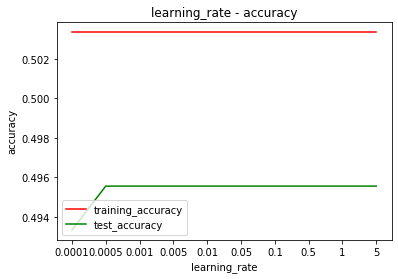

In [138]:
plt.figure(2)
plt.title('learning_rate - accuracy')
plt.plot(list(train_acc.values()), c='red',  label = 'training_accuracy')
plt.plot(list(test_acc.values()), c='green',  label = 'test_accuracy')
plt.xticks(range(len(test_acc)), list(test_acc.keys()))
plt.xlabel('learning_rate')
plt.ylabel('accuracy')
plt.legend(loc='lower left')

In [143]:
#learning curve with different num_iterations
learning_rate = 1e-2

train_acc = {}
test_acc = {}
for num_iterations in range(100, 400, 100):
    pred = model(X_train, y_train.reshape(-1, 1), X_test, y_test.reshape(-1, 1), num_iterations, learning_rate, print_cost = False)
    train_acc[num_iterations] = pred["training_accuracy"]
    test_acc[num_iterations] = pred["test_accuracy"]


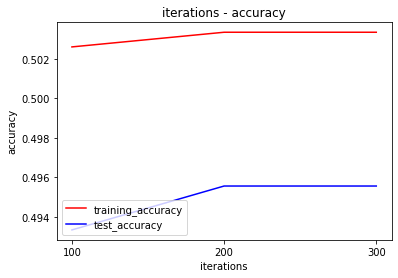

In [145]:
plt.figure(3)
plt.title('iterations - accuracy')
plt.plot(list(train_acc.values()), c='red',  label = 'training_accuracy')
plt.plot(list(test_acc.values()), c='blue',  label = 'test_accuracy')
plt.xticks(range(len(test_acc)), list(test_acc.keys()))
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.legend(loc='lower left')

plt.show()

##### 4.2 Observe the effect of iteration_num on the test accuracy.

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digits (0,1,2,3,4,5,6,7,8,9) is in the image.

# Congratulations ! You have completed assigment 4. 